# Sentiment Analysis for Mental Health Monitoring 🤯


<img src="https://img.freepik.com/free-vector/mental-health-awareness-concept_23-2148531011.jpg" alt="Sample Image" width="100%" height="700">




## Sentiment Analysis for Mental Health Monitoring 🤯
___

> [dataset source](https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health) 🔗

---


```


```
---


## **About The Datset** 🧷
This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.

---
## **Data Souce** 🌍
The dataset integrates information from the following Kaggle datasets:

 - 3k Conversations Dataset for Chatbot
 - Depression Reddit Cleaned
 - Human Stress Prediction
 - Predicting Anxiety in Mental Health Data
 - Mental Health Dataset Bipolar
 - Reddit Mental Health Data
 - Students Anxiety and Depression Dataset
 - Suicidal Mental Health Dataset
 - Suicidal Tweet Detection Dataset
---

###  **Datset Over View**  :

* **Description:**

    This dataset is a comprehensive collection of 50,000 text statements related to mental health, each tagged with one of seven mental health statuses. The primary purpose of this dataset is to assist in building machine learning models for classifying mental health conditions based on textual data, such as social media posts or other user-generated content.

* **Columns:**
  1. **unique_id**: A unique identifier for each entry.
  2. **statement**: A piece of text, typically a statement or comment, associated with a particular mental health status.
  3. **status**: The mental health status assigned to the statement. The possible categories are:
    - Normal
    - Depression
    - Suicidal
    - Anxiety
    - Stress
    - Bi-Polar
    - Personality Disorder

---
### **Usage** :
This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data.
It can be used in various applications such as:

- Chatbot development for mental health support.
- Sentiment analysis to gauge mental health trends.
-
---

### **How we use NLP Concepts**


  In our text processing methodology, we begin by removing punctuation, URLs, and hyperlinks from the statements. Additionally, we eliminate stop words, such as "is," "are," and "the," to enhance the focus on more informative terms.


  In the realm of morphological analysis, we extract the stems of the words. Subsequently, we employ a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to transform the processed text into a vector representation. This vector is then utilized to fit the mode

---

### **Conlusion**
  in the conclusion we train and tune  a four model wich is :
  * SVM  
  * Logistic Regression
  * Neural Ntwork
  * KNN
  the first three give a Convergent results with accuracy near to 76 % , and the last one give  a 65 % acc .

```css












```

---



## Two Level Classification  Approach

---

### About Two-Level Classification

In a two-level classification approach, we break down a multi-class classification problem into two stages:

1. **Stage 1 - Binary Classification**:
   - This stage first classifies data into two  categories: **Normal** ans **Non-Normal**.
   - By creating this separation, we simplify the problem and reduce the initial complexity, allowing the model to focus on distinguishing between these high-level classes.
   - This binary classifier uses features from the full dataset, ensuring that it can accurately detect if a statement falls into the "Normal" or "Non-Normal" category.

2. **Stage 2 - Multi-Class Classification**:
   - In this stage, we take statements classified as **Non-Normal** from Stage 1 and further classify them into specific mental health categories such as **Depression**, **Suicidal**, **Anxiety**, **Stress**, **Bi-Polar**, and **Personality Disorder**.
   - This multi-class classifier uses data that has already been identified as "Non-Normal," focusing on differentiating among various mental health conditions.
   
### Why Two-Level Classification?

- 🌵**Improved Accuracy**: This approach allows each classifier to focus on a subset of the problem, potentially increasing accuracy by reducing the complexity each model has to handle.
- 🍀 **Efficient Use of Resources**: By filtering out "Normal" cases in Stage 1, Stage 2 can concentrate only on differentiating among the specific mental health conditions, making it more efficient.
- 🦠 **Handling Imbalance**: Many datasets are imbalanced, with "Normal" cases being more common. Splitting the classification into two levels allows us to address class imbalance in each level separately.

### How It Works in This Model

1. **Data Preparation**:
   - First, we preprocess the dataset by cleaning the text and extracting features (e.g., TF-IDF, POS tags, emojis).
   - Then, we split the data for training and testing each stage separately.

2. **Training**:
   - **Stage 1**: We train a binary classifier on the full training data to classify statements as **Normal** or **Non-Normal**.
   - **Stage 2**: We train a multi-class classifier on the subset of training data labeled as **Non-Normal**, focusing only on the six specific mental health conditions.

3. **Testing**:
   - For each test instance, we first use Stage 1 to determine if it’s "Normal" or "Non-Normal."
   - If classified as **Non-Normal**, the instance is passed to Stage 2, where it is classified into one of the specific mental health categories.

### Evaluation and Metrics

- **Stage-Specific Metrics**: Each stage is evaluated separately, with accuracy, recall, precision, and F1-score measured for both the binary and multi-class classifiers.
- **Combined Evaluation**: Finally, we combine predictions from both stages to evaluate the overall performance of the two-level classification system.

This two-level approach allows us to accurately identify both "Normal" and specific mental health conditions, leveraging targeted classification strategies to improve overall accuracy and interpretability.

# ***📋 Dataset Loading and Preparing***


### Constants

In [ ]:
data_read_path = '/content/drive/MyDrive/CombinedData.csv'
data_clean_path='/content/drive/MyDrive/CombinedDataCleaned.csv'

## Import Libraries
---
lets start by importing the nessacary libraries

### import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
#import emoji

import re
import random
#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
from textblob import TextBlob


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

#import stanza
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


### Download packages

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
pip install stanza


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 30.2 MB/s eta 0:00:00


## Loading the dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_read_path, index_col=0)

In [ ]:
df.head(3)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


**notes1:** as we se at first , we have a three column the id which we should drop it, the statment that represent the "input" and the output which is the status. so our problem is just a classification and we need to make a nlp pre processing to extract feature  as we can from the statment to make them as input to the model.

**note2:** as we say, also we wil add some statistical feature (test len) to  nlp extracted features.

## some random example
---
* to see the statement how itis

In [ ]:
# Group by status and get a random statement from each group
random_statements = df.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}\n")
    print(f"Statement: {statement}\n")
    print("-----------------------------------")

Status: Anxiety

Statement: Sweating Whenever I visit in a group of 3 or more in the same room after about 45 minutes I start to sweat a lot and smell and feel really hot. It doesn’t matter if I’m with strangers, friends or family.  
Does anyone else feel like this? Or have any suggestions?

-----------------------------------
Status: Bipolar

Statement: Bipolar Reddit, what's the best life lesson you've learned after coming out of a Psychosis? After my first one I basically had to reprogram my mind. I found that there was a lot of nonsense thoughts that I didn't even agree with. So I learned to be mindful of the ideas and thoughts I allow to circle around in my mind.


What's yours???


Edit: Apparently Bipolar people are wise as fuck.

-----------------------------------
Status: Depression

Statement: I will keep this short.My wife and I have been together since the age of 15. 21 years without break. we are the type of couple to argue over the phone about who hangs up first. Some yea

---
## Data set Descriping

In [ ]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


## Missings Value Removal

In [ ]:
df.isna().sum()

,0
statement,362
status,0


In [ ]:
df.dropna(inplace = True)
df.isna().sum()

,0
statement,0
status,0


## What is our Labels 'target'?



In [ ]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [ ]:
df['status'].value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


## How the samples are distributed over the status ?

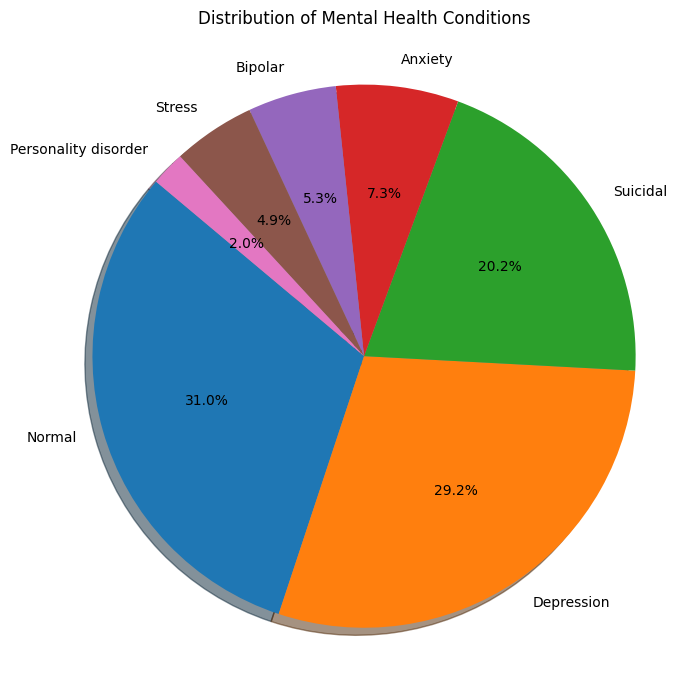

In [ ]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors for 7 categories)
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

## How the statements length are distibuted?

#### define statement legth column

In [ ]:
# calculate the length of each statement
df['statemnent_length'] = df['statement'].apply(lambda text : len(text))


In [ ]:
# calculate the length of each statement
df['num_of_words'] = df['statement'].apply(lambda text : len(text.split()))

#### statement length distribution

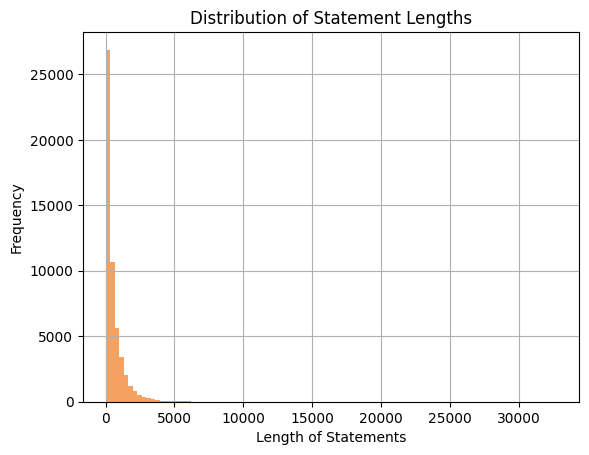

In [ ]:
# plot the distribution of statement lengths
df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Statement Lengths (Without Outliers)

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['statemnent_length'].quantile(0.25)
Q3 = df['statemnent_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

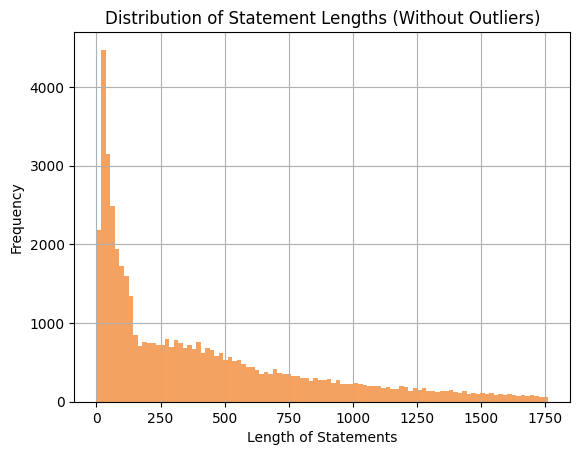

In [ ]:
# Filter out the outliers
filtered_df = df[(df['statemnent_length'] >= lower_bound) & (df['statemnent_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statemnent_length'].hist(bins=100, color='#F4A261')
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

---
```








```
```








```
---

## Distributions : *Can we find simple classifier ?*

### Helpper function

In [ ]:
status_analysis = df.groupby('status').agg({
    'statemnent_length': ['mean', 'median', 'std'],
    'num_of_words': ['mean', 'median', 'std']
})

### Box plot of statement length vs status

In [ ]:
# Filter the DataFrame to show only rows where the 'sentence_length' is less than 10
df_short_sentences = df[df['statemnent_length'] <400]

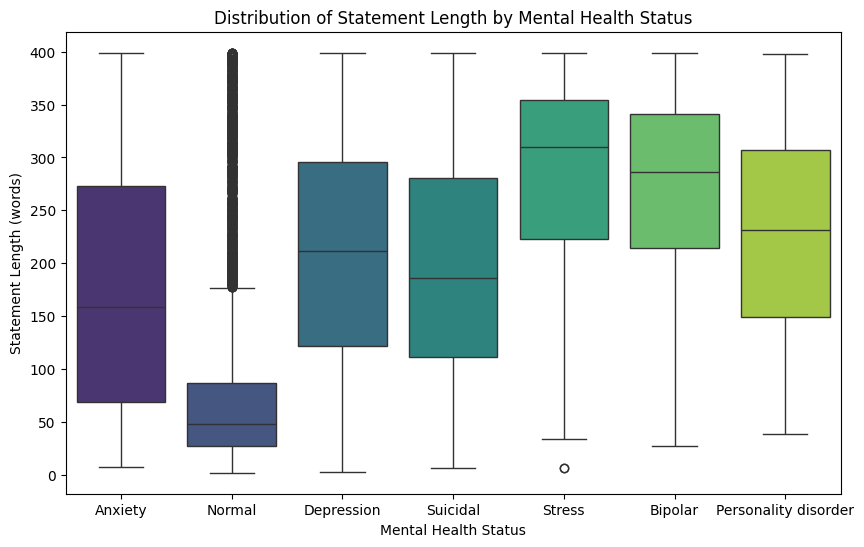

In [ ]:
# Plot a box plot of statement length by status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_short_sentences, x='status', y='statemnent_length', palette="viridis")
plt.title("Distribution of Statement Length by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Statement Length (words)")
plt.show()

### Avarage of characters per statment

Text(0.5, 1.0, 'Avarage of characters per statment')

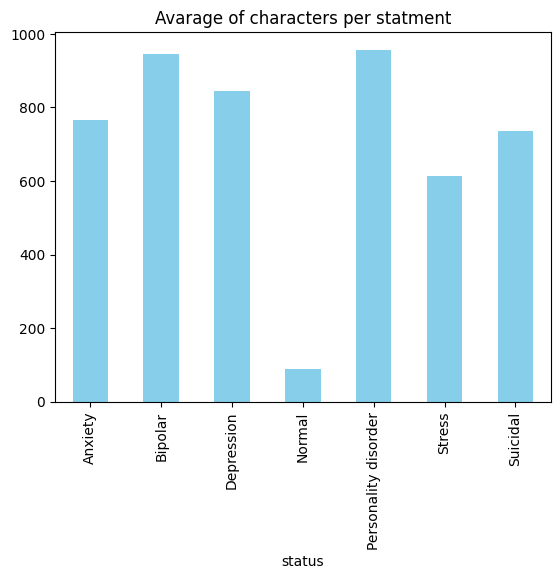

In [ ]:
status_analysis['statemnent_length']['mean'].plot(kind='bar',color='skyblue')
plt.title('Avarage of characters per statment')

### Avarage of words per statment

Text(0.5, 1.0, 'Avarage of words per statment')

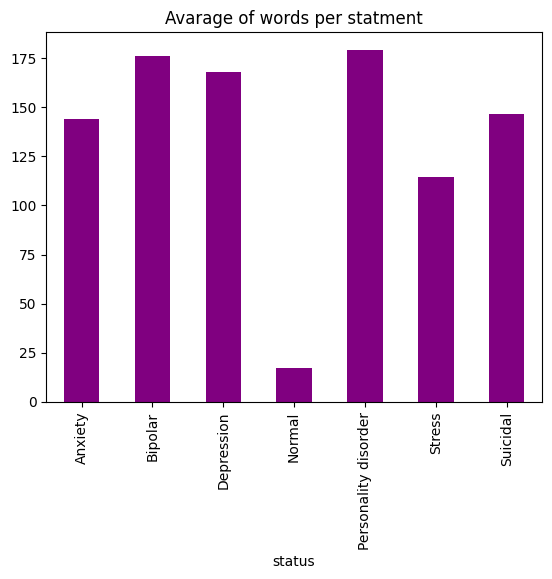

In [ ]:
status_analysis['num_of_words']['mean'].plot(kind='bar',color='purple')
plt.title('Avarage of words per statment')

## What is the frequency of POS Tags ?

#### Helper function

In [ ]:
def plot_pos_frequency(df):
    # Combine all statements into one text
    blob = TextBlob(" ".join(df['statement'].astype(str)))

    # Extract POS tags and create DataFrame
    pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
    pos_counts = pos_df['pos'].value_counts()[:50]  # Get top 50 POS tags by frequency

    # Plot the frequency of POS tags
    plt.figure(figsize=(10, 6))
    pos_counts.plot(kind='bar')
    plt.xlabel("Part Of Speech")
    plt.ylabel("Frequency")
    plt.title("Frequency of Parts of Speech in Statements")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


#### POS Frequency

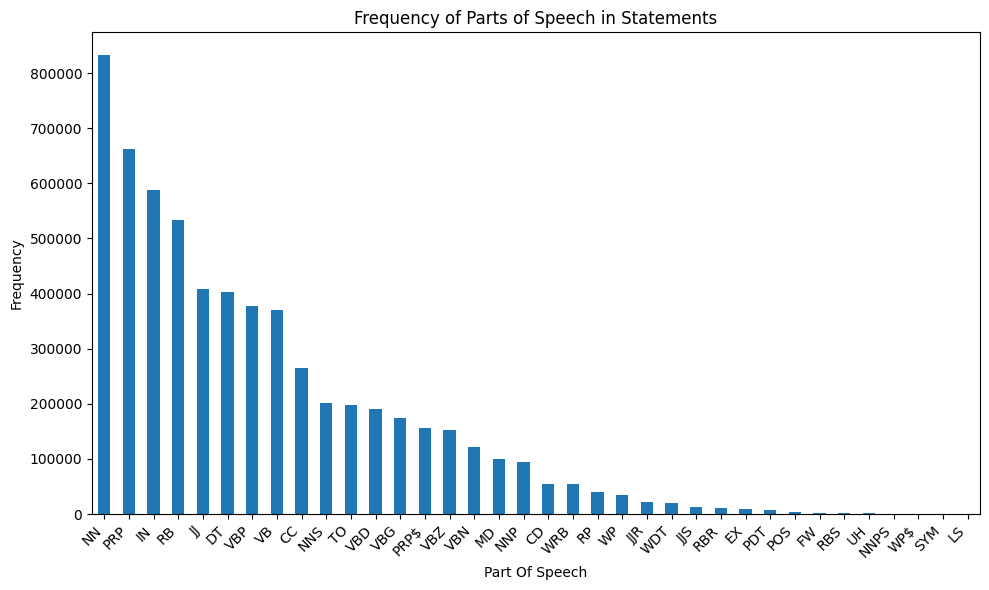

In [ ]:
# Run the function on your DataFrame
plot_pos_frequency(df)

# ***🦖 NLP Pre-Processing***



## what we will do


---

in this part of the ml pipeline, we perform several essential NLP preprocessing steps to prepare our data for machine learning. These steps include:

  1. **Text Processing:**
      * include :
        - pattern reomving (links,emails and etc.)
        - lower casing
        - stop words removing

  2. **tokinezation & Stemming :**

     *  Tokenization :  
        - this step converts each text sample into an array of tokens (individual words or sub-words).
        -  we use Stanza word tokenizer to ensure precise, language-specific tokenization.
     * Stemming :
        
        - in this step, we transform each tokenized array into a stemmed version, reducing each word to its base or root form.
        - stanza NLP tools allow us to use various stemming techniques for extracting meaningful root words.
  

  3. **Part-of-Speech (POS) Tagging and Filtering**:

  - sing Stanza, we apply POS tagging to identify and filter specific parts of speech, such as:
       - **Verbs**: Identify and include only verbs to capture action-related semantics.
       - **Nouns**: Extract nouns to focus on entity- or object-based information.
       - **Adjectives**: Include adjectives to analyze descriptive language and sentiment.
  - This POS filtering allows us to tailor the input data by emphasizing different linguistic elements and can be customized based on the classification or NLP goals.



## 1. Text Processing:

#### How the sentences frequency is ?

In [ ]:
# Calculate the number of sentences for each statement
df['num_of_sentences'] = df['statement'].apply(lambda text : len(nltk.sent_tokenize(text)))

bar chart for the num f scentences and its frequency

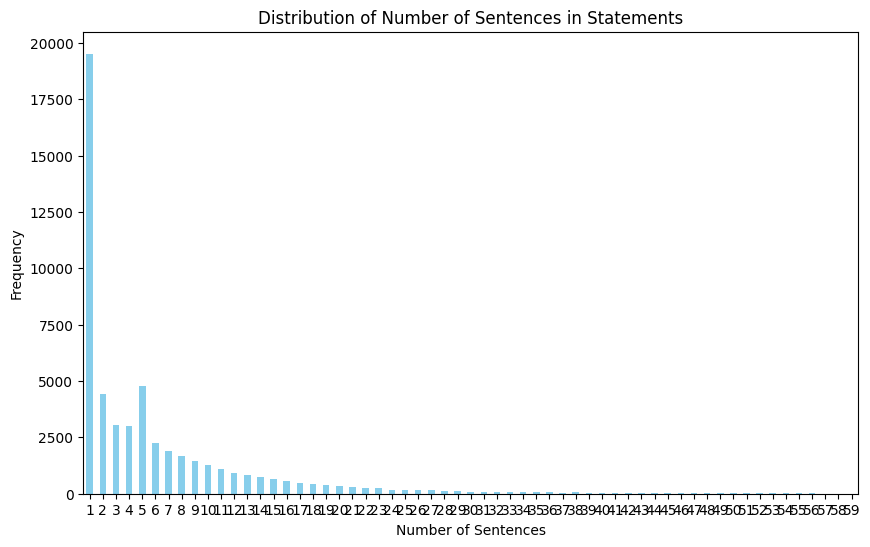

In [ ]:
# Plot distribution of the number of sentences\n",
plt.figure(figsize=(10, 6))

df[df['num_of_sentences'] <60 ]['num_of_sentences'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('Distribution of Number of Sentences in Statements')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


### 1.1 Lower casing

In [ ]:
df.sample(1)

,statement,status,statemnent_length,num_of_words,num_of_sentences
26087,I am 21 years old and there is no hope for me....,Suicidal,1180,228,14


In [ ]:
df['statement']=df['statement'].str.lower()
df.sample(1)

,statement,status,statemnent_length,num_of_words,num_of_sentences
8197,i love sleep it is like a teaser trailer for d...,Depression,526,105,5


### 1.2 Special Patterns Removing

 here we define our function to remoe the speacial paterns which is  :  
 1. links
 2. emails
 3. markdown text
 4. handles
 5. puctuation

In [ ]:
def remove_patterns(text):

    # remove URL's
    text = re.sub(r'http[s]?://\S+', '', text)

    # remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)

    # remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()


aplying the special patterns removing

In [ ]:
# apply the function to the statements
df['statement'] = df['statement'].apply(remove_patterns)

### 1.3 Remove Stop words

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [ ]:
# df['statement'] = df['statement'].apply(remove_stopwords)

### 1.4 Emoji-features Extractions

#### Convert smiles to words

In [ ]:
# Define the emoticon map with patterns and corresponding labels
emoticon_map = {
    r':\)+': 'happy_face',
    r':D+': 'very_happy_face',
    r':\(+': 'sad_face',
    r':\'\(+': 'crying_face',
    r';\)+': 'winking_face',
    r':O': 'surprised_face',
    r'>:\(+': 'angry_face',
    r':\|': 'neutral_face',
    r'<3': 'heart',
    r'B-\)+': 'cool_face'
}

In [ ]:
# Function to convert emojis and emoticons to descriptive text
def convert_emojis(text):

    for emoticon, replacement in emoticon_map.items():
        text = re.sub(emoticon, replacement, text)
    text = emoji.demojize(text, delimiters=("", ""))
    return text


text of emojies only

In [ ]:
# Function to extract emoticons and replace with descriptive labels
def extract_emojis(text):
    emoji_labels = []
    for pattern, label in emoticon_map.items():
        matches = re.findall(pattern, text)
        emoji_labels.extend([label] * len(matches))  # Add label for each matched emoticon
    return ' '.join(emoji_labels)  # Join labels into a single string


apply the emoji converter

In [ ]:
# Apply emoji conversion to the 'statement' column
df['statement_with_emojis'] = df['statement'].apply(convert_emojis)
df['statement'] = df['statement'].apply(convert_emojis)



#### emojies bar chart

In [ ]:
from collections import Counter

# Split the emoji labels into individual words and flatten the list
all_emojis = ' '.join(df['statement_with_emojis']).split()  # Flatten all labels into a single list

# Count occurrences of each emoji label
emoji_counts = Counter(all_emojis)
emoji_counts_df = pd.DataFrame(emoji_counts.items(), columns=['Emoji', 'Count'])


In [ ]:
emoji_counts_df

,Emoji,Count
0,oh,970
1,my,119437
2,gosh,44
3,trouble,564
4,sleeping,904
...,...,...
77347,coprophobia,1
77348,strokelike,1
77349,attacklike,1
77350,tingeling,1


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set up the plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(emoticon_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})

# # Add titles and labels
# plt.title("Distribution of Emoticons by Mental Health Status")
# plt.xlabel("Emoticon (Symbol and Description)")
# plt.ylabel("Mental Health Status")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()


### 1.5 Slang Converting

#### Define the set of slang

In [ ]:
# Define a custom slang dictionary
slang_dict = {
    "idk": "I don't know",
    "omg": "oh my god",
    "rn": "right now",
    "brb": "be right back",
    "tbh": "to be honest",
    "ikr": "I know, right",
    "smh": "shaking my head",
    "lol": "laughing out loud",
    "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing",
    "afaik": "as far as I know",
    "idc": "I don't care",
    "np": "no problem",
    "fyi": "for your information",
    "imo": "in my opinion",
    "pls": "please",
    "thx": "thanks",
    "w/": "with",
    "b4": "before",
    "bc": "because",
    "gr8": "great",
    "btwn": "between",
    "cya": "see you",
    "ty": "thank you",
    "bday": "birthday",
}


#### Define the expanding functino

In [ ]:
changes = 0  # Count how many words are expanded


In [ ]:

# Function to expand slang terms based on the custom dictionary
def expand_slang(text):
    words = text.split()
    expanded_words = []
    global changes
    for word in words:
        # Check if the word is in the slang dictionary
        expanded_word = slang_dict.get(word.lower(), word)
        if word.lower() in slang_dict:
            changes=changes+ 1  # Increment count if a word was expanded
        expanded_words.append(expanded_word)

    return ' '.join(expanded_words)

#### Apply the expanding

In [ ]:

# Apply the slang expansion function to the 'statement' column
df['statement'] = df['statement'].apply(expand_slang)


In [ ]:
print(f"Total number of slang words expanded across all rows: {changes}")


Total number of slang words expanded across all rows: 4525


### 1.6 Expand Contractions

In [ ]:
df['statement'][37456]

'ih shopeeee disturbing gws idupp mulu fashion make pusink'

apply contraction fix funtionns

In [ ]:
df['statement']=df['statement'].apply(contractions.fix)

In [ ]:
df['statement'][37456]

'ih shopeeee disturbing gws idupp mulu fashion make pusink'

## 2.Tokenization & Stemming

 #### Intialize Stanza Piplein

In [ ]:
# Tokenization functions using NLTK
def word_tokenize(text):
    return nltk.word_tokenize(text)

def sentence_tokenize(text):
    return nltk.sent_tokenize(text)


### 2.1 Tokenization

#### Words tokenization

define word tokenizing funcyion

In [ ]:
nltk.download('punkt')

def extract_tokens(text):
    # Tokenize the text into words using NLTK
    words = nltk.word_tokenize(text)
    return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


apply extract tokenz function

In [ ]:
# apply word tokenize to each element in the statements
df['tokens'] = df['statement'].apply(extract_tokens)


#### Sample after tokenizing

In [ ]:
df.sample(2)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens
46559,what is your personal experience during highs ...,Bipolar,236,39,4,what is your personal experience during highs ...,"[what, is, your, personal, experience, during,..."
18017,i am so so tired of this after nearly 2 years ...,Suicidal,1173,233,10,i am so so tired of this after nearly 2 years ...,"[i, am, so, so, tired, of, this, after, nearly..."


### 2.2 Stemming

#### Intializing the steemer

In [ ]:
# Initialize the stemmer
stemmer = nltk.SnowballStemmer("english")

# Function to stem tokens
def tokens_stem(tokens):
    # Extract and stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


#### Apply the stemming Function

In [ ]:
df['tokens_stemmed'] = df['tokens'].apply(tokens_stem)

#### Sample

In [ ]:
# Display sample of the DataFrame
df.sample(5)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens,tokens_stemmed
13760,small backstory i used to be a counselor on th...,Suicidal,2755,528,34,small backstory i used to be a counselor on th...,"[small, backstory, i, used, to, be, a, counsel...",small backstori i use to be a counselor on the...
24820,i do not know what to do or how to go on i jus...,Suicidal,669,147,20,i do not know what to do or how to go on i jus...,"[i, do, not, know, what, to, do, or, how, to, ...",i do not know what to do or how to go on i jus...
6952,uh my account is green or not,Normal,29,7,1,uh my account is green or not,"[uh, my, account, is, green, or, not]",uh my account is green or not
12132,hey everyone my girlfriend and i began dating ...,Depression,2308,452,28,hey everyone my girlfriend and i began dating ...,"[hey, everyone, my, girlfriend, and, i, began,...",hey everyon my girlfriend and i began date abo...
25732,i always feel useless stupid and dumb i cannot...,Suicidal,1053,213,16,i always feel useless stupid and dumb i cannot...,"[i, always, feel, useless, stupid, and, dumb, ...",i alway feel useless stupid and dumb i can not...


---

```



```
---


### 2.3 word counts

In [ ]:
colors = ['#16325B', '#227B94', '#78B7D0', '#FFDC7F', '#18587A', '#11999E', '#283644']

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

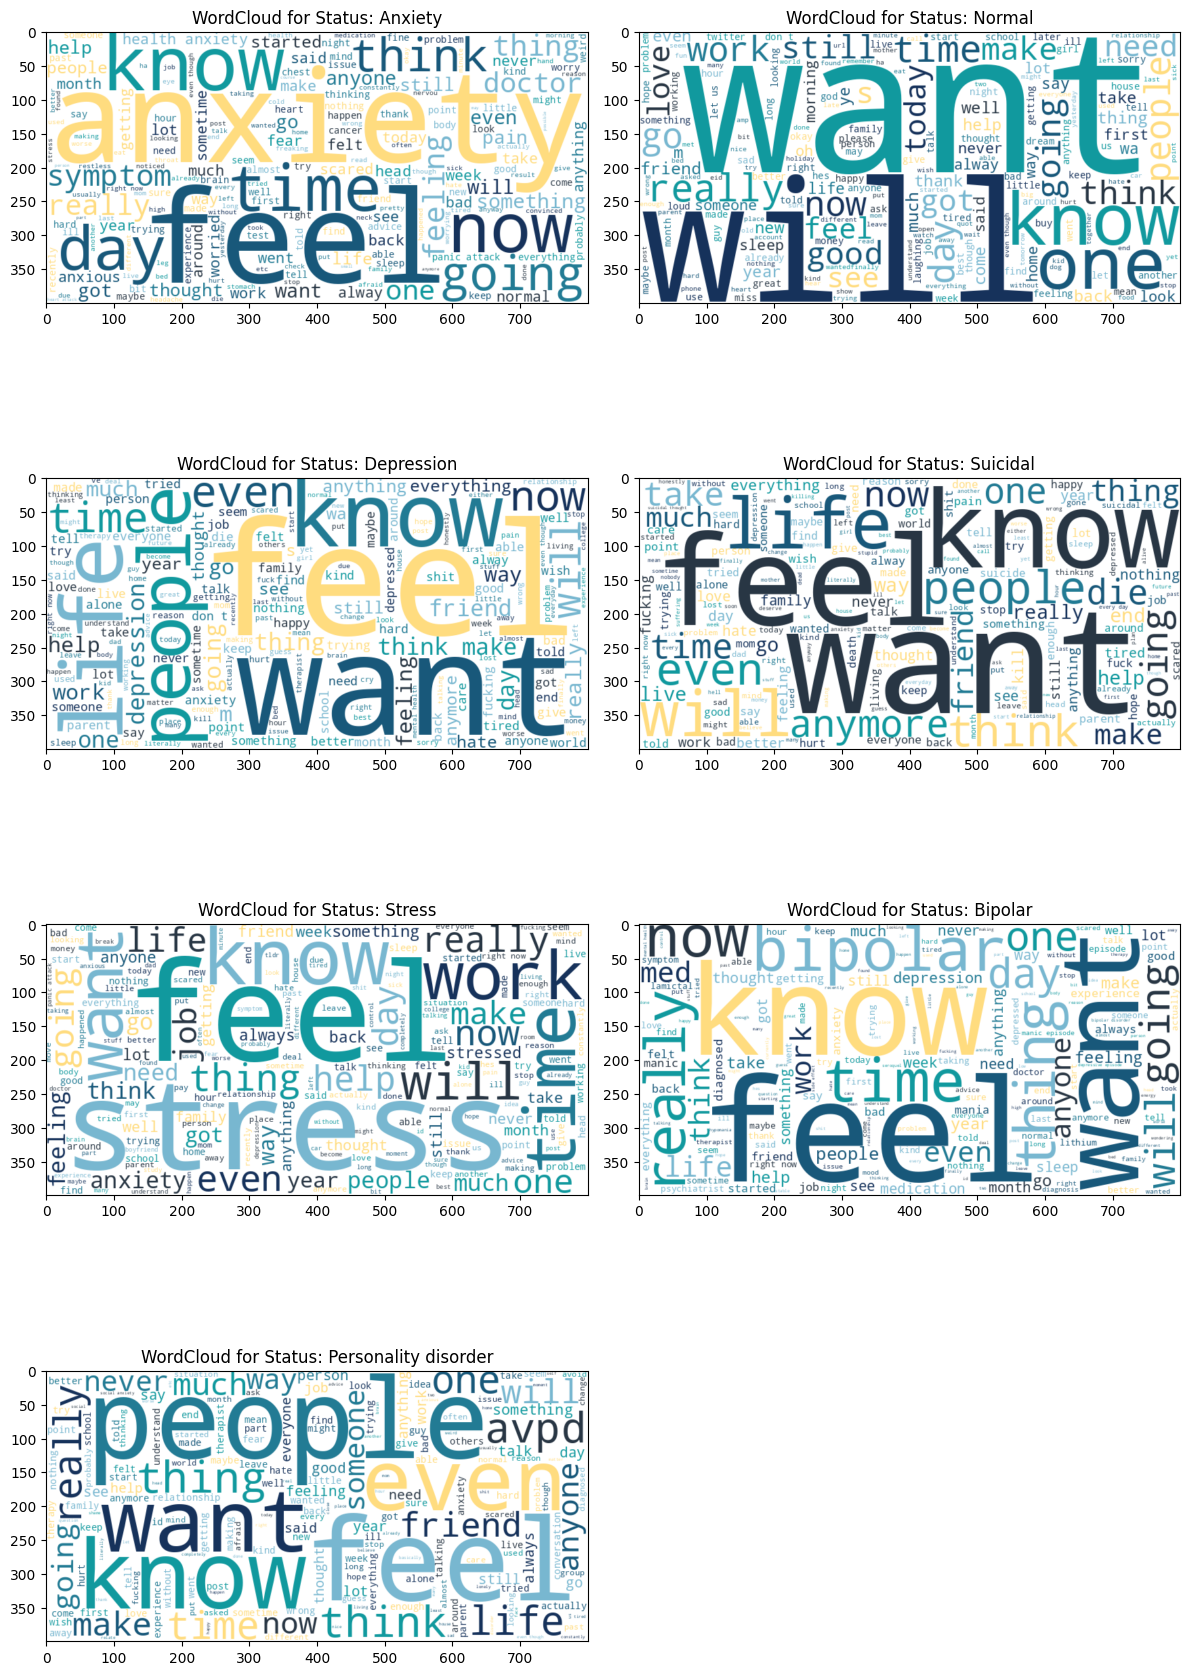

In [ ]:
statuses = df['status'].unique()

plt.figure(figsize=(12, 36))  # Adjust figure size as needed

# Generate and plot the WordCloud for each category
for i, status in enumerate(statuses):
    # Filter the tokens data for the current status
    tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Plot the WordCloud in a subplot
    axes = plt.subplot(len(statuses) // 2 + 1, 2, i + 1)  # Adjust number of rows and columns dynamically
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Status: {status}')
    #plt.axis('off')  # Turn off axes for a cleaner look

# Apply tight layout after generating all subplots
plt.tight_layout()

# Adjust the vertical spacing between subplots (hspace controls vertical space)
plt.subplots_adjust(hspace= -0.8)
plt.show()

---
```








```
---



## 3. Part-Of-Speach (POS) Tagging

### 3.1 Extract POS Taggs

##### Nlp

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor | Package         |
-------------------------------
| tokenize  | combined        |
| mwt       | combined        |
| pos       | combined_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


#### define function to extract pos

In [ ]:
import nltk

def extract_pos_tokens(text, pos_tag_prefix):
    # Tokenize the input text
    tokens = nltk.word_tokenize(text)
    # Get the POS tags
    pos_tags = nltk.pos_tag(tokens)

    # Extract tokens based on POS tag prefix
    tokens_filtered = [word for word, pos in pos_tags if pos.startswith(pos_tag_prefix)]

    return ' '.join(tokens_filtered)

#### Extract Verbs

In [ ]:
df['tokens_verbs'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'V'))

#### Extract Nouns

In [ ]:
df['tokens_nouns'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'N'))

#### Extrac Adjectives

In [ ]:
df['tokens_adj'] = df['statement'].apply(lambda x: extract_pos_tokens(x, 'J'))

#### Sample

In [ ]:
df.sample(2)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens,tokens_stemmed,tokens_verbs,tokens_nouns,tokens_adj
3400,the first one still sucks if you continue the ...,Normal,59,11,1,the first one still sucks if you continue the ...,"[the, first, one, still, sucks, if, you, conti...",the first one still suck if you continu the pr...,sucks continue,plot,first previous
17428,i catch myself thinking and considering suicid...,Suicidal,437,91,8,i catch myself thinking and considering suicid...,"[i, catch, myself, thinking, and, considering,...",i catch myself think and consid suicid daili i...,catch thinking considering do think need walk ...,i i plan i river pills cabinet bit i i i anyth...,i suicide daily i scared suicidal i self


## 4. Dependency Parsing

###  Initialize Stanza pipelin

In [ ]:
# Initialize Stanza pipeline with dependency parsing
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


### extract dependencies function

In [ ]:

# Function to extract dependency relations
def extract_dependencies(text):
    doc = nlp(text)
    dependencies = []
    for sentence in doc.sentences:
        for word in sentence.words:
            # Append the word, its dependency relation, and its head word
            dependencies.append((word.text, word.deprel, sentence.words[word.head - 1].text if word.head > 0 else "ROOT"))
    return dependencies


consume alot of memory
OutOfMemoryError                          Traceback (most recent call last)
/usr/local/lib/python3.10/dist-packages/stanza/pipeline/depparse_processor.py in process(self, document)
     64                 for i, b in enumerate(batch):
---> 65                     preds += self.trainer.predict(b)
     66             if batch.data_orig_idx is not None:

22 frames
OutOfMemoryError: CUDA out of memory. Tried to allocate 12.35 GiB. GPU 0 has a total capacity of 14.75 GiB of which 12.09 GiB is free. Process 4177 has 2.65 GiB memory in use. Of the allocated memory 1.90 GiB is allocated by PyTorch, and 634.24 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


In [ ]:
# def extract_important_words(text):
#     doc = nlp(text)
#     important_words = []

#     for sentence in doc.sentences:
#         for word in sentence.words:
#             # Select words based on dependency relation
#             if word.deprel in {'root', 'nsubj', 'dobj', 'amod', 'advmod'}:
#                 important_words.append(word.text)

#     return ' '.join(important_words)


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')


In [ ]:

def extract_important_words(text):
    doc = nlp(text)
    important_words = set()  # Use a set to store unique words

    for token in doc:
        # Extract the head word if it has relevant dependency relations
        if token.dep_ in {'nsubj', 'dobj', 'amod', 'advmod', 'pobj', 'ROOT'}:
            important_words.add(token.text)  # Add the current token
            important_words.add(token.head.text)  # Add the head word

            # Include the children of the head word for additional context
            for child in token.head.children:
                important_words.add(child.text)

    return ' '.join(important_words)

### Applying dep parse

In [ ]:
# Apply the function to extract important words
df['important_words'] = df['statement'].apply(extract_important_words)


### result

In [ ]:
# Sample output
df[['important_words','statement']].sample(3)


,important_words,statement
38152,don time general all what with connect last wh...,i don t remember the last time i wa really abl...
20394,god 17 to it killed and kind should am so ever...,so this might be kind of long but here gose i ...
44553,snowing tennessee it too in is,it is snowing in tennessee too


# ***🚦 Vectorizing using TF-IDF***


## About VEctorizing Approach

**What is the TF (Term of Frequency) and IDF (Inverse Document Frequency)?**

---
```


```
---

* **What is TF-IDF?**

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents, typically in the context of text mining and Natural Language Processing (NLP). It is commonly used as a feature extraction method to convert textual data into numerical features that machine learning models can process.

* The TF-IDF measure combines two components:

  1. **Term Frequency (TF):**

  **Definition:** The number of times a word (term) appears in a document, divided by the total number of words in that document. It gives us a sense of how important a word is within a single document.

  **Formula:**

   \begin{align}
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
   \end{align}

  
  2. **Inverse Document Frequency (IDF):**
  
    **Definition:** The logarithm of the total number of documents in the corpus divided by the number of documents containing the term.
  
    It measures how important a word is across the whole corpus. Common words that appear in many documents (like "the," "is") have low IDF values because they are less informative, while rare terms have higher IDF values.

    **Formula:**



  \begin{align}
   \text{IDF}(t, D) = \log \left( \frac{\text{Total number of documents in the corpus}}{1 + \text{Number of documents containing the term } t} \right)
 \end{align}

3. **TF-IDF:**

  **Definition:** The product of the term frequency (TF) and inverse document frequency (IDF) for a term in a document. It reflects both the term's frequency within a specific document and how unique or important the term is across the entire document corpus.
  
  **Formula:**

   \begin{align}
   \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
   \end{align}

  In these formulas:
  - \( t \) refers to a term (word),
  - \( d \) refers to a document,
  - \( D \) refers to the entire corpus (collection of documents),
  - \( \log \) is the logarithm function, typically base 10 or natural logarithm.


* **How TF-IDF is Useful**
  **Feature Extraction in NLP:** TF-IDF helps convert raw text data into a matrix of numerical features, making the data suitable for machine learning models. Each document is represented as a vector of TF-IDF values, where each value corresponds to the importance of a word in that document. This is a common technique in text classification tasks, such as sentiment analysis, spam detection, and topic classification.

  **Captures the Importance of Words:** By using TF-IDF, we can ignore frequently occurring but uninformative words (e.g., "the", "and") and focus on more meaningful terms that are key to the context of a document. This helps improve the accuracy and relevance of the model's predictions by emphasizing words that differentiate one document from another.

  **Reduces Noise in Text:** TF-IDF reduces the weight of very common words across all documents, as they are often not useful for distinguishing between documents. It assigns higher importance to rare and meaningful terms, which tend to carry more information about the content of the document.

  **Improves Text Similarity Measures:** TF-IDF vectors are often used to calculate the similarity between documents (e.g., using cosine similarity). This is useful in tasks like document clustering, search engines, and recommendation systems.

  
* **Use Case in Mental Health Sentiment Analysis**

  In our dataset, which contains mental health-related statements, applying TF-IDF can help the model understand which words are most significant for predicting the mental health status of a given statement. For example:

    - Words like "hopeless," "depressed," and "suicidal" may have high TF-IDF scores in documents labeled with "Depression" or "Suicidal" mental health statuses, but these words may be rare across other categories.
  
   - Common words like "I," "the," and "is" will have low IDF values since they appear in many documents, making them less useful for classification.

  By transforming the text data into TF-IDF vectors, you provide a more informative and compact representation of the statements, which can lead to better performance of machine learning models.



---
```









```
---

## Initialize separate TF-IDF Vectorizer


Initialize separate TF-IDF Vectorizer for verbs and nouns and adj , stemm


In [ ]:
vectorizer_emojis = TfidfVectorizer(max_features=100, stop_words='english')

vectorizer_imp = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, stop_words='english')

vectorizer_stemmes = TfidfVectorizer(ngram_range=(1, 2), max_features=2000, stop_words='english')

vectorizer_verbs = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')

vectorizer_nouns = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')

vectorizer_adjectives = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english')


## Extract Verb, Nouuns , ... Vectors

### importtant word

In [ ]:

X_imp_tfidf = vectorizer_emojis.fit_transform(df['important_words'])


### Emojies

In [ ]:
# Emojis
X_emojis_tfidf = vectorizer_emojis.fit_transform(df['statement_with_emojis'])

### stemmes

In [ ]:
# Adjectives
X_stemm_tfidf = vectorizer_stemmes.fit_transform(df['tokens_stemmed'].astype(str))


### verbs

In [ ]:
# Verbs
X_verbs_tfidf = vectorizer_verbs.fit_transform(df['tokens_verbs'].astype(str))

### nouns

In [ ]:
# Nouns
X_nouns_tfidf = vectorizer_nouns.fit_transform(df['tokens_nouns'].astype(str))

### Adjectives

In [ ]:
# Adjectives

X_adjectives_tfidf = vectorizer_adjectives.fit_transform(df['tokens_adj'].astype(str))


## comdine Vectors

In [ ]:


# Combine all TF-IDF features into one matrix
# X_combined_tfidf = hstack([2*X_verbs_tfidf, X_nouns_tfidf, 0.5 * X_adjectives_tfidf, 0.5*X_emojis_tfidf,2*X_stemm_tfidf])
X_combined_tfidf = hstack([X_imp_tfidf,0.8*X_verbs_tfidf, 1.2*X_nouns_tfidf,X_stemm_tfidf])
print("Total number of combined features:", X_combined_tfidf.shape[1])


Total number of combined features: 4100


# ***🤺 Feature Selection***

### Spliting

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, df['status'], test_size=0.2, random_state=42)

### Select K Best

In [ ]:
# Arrays to store results
feature_counts = []
train_accuracies = []
test_accuracies = []

# Iterate over different values of k
for k in range(100, X_train.shape[1], 200):
    # Select top k features using mutual information as the score function
    selector = SelectKBest(score_func=chi2, k=k)

    # Fit and transform the training set
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=600, random_state=42)
    model.fit(X_train_selected, y_train)

    # Record the number of features and accuracies
    feature_counts.append(k)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train_selected)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test_selected)))


### Plot

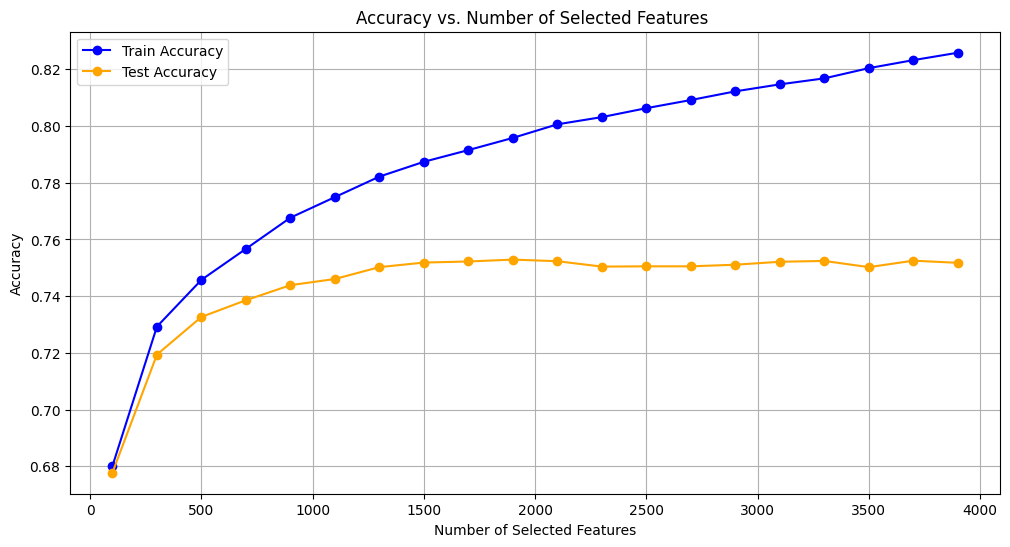

In [ ]:
# Plot the accuracy vs. number of features
plt.figure(figsize=(12, 6))
plt.plot(feature_counts, train_accuracies, label="Train Accuracy", marker="o", color="blue")
plt.plot(feature_counts, test_accuracies, label="Test Accuracy", marker="o", color="orange")
plt.xlabel("Number of Selected Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Selected Features ")
plt.legend()
plt.grid()
plt.show()


# ***🦹 Dataset Spliting, Encoding and Staging***

In [ ]:
selector = SelectKBest(score_func=chi2, k=2000)

    # Fit and transform the training set
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Split the vectorized data into train and test sets
#X_train_full, X_test, y_train_full, y_test = train_test_split(X_combined_tfidf, df['status'], test_size=0.2, random_state=42)
X_train_full, X_test, y_train_full, y_test =X_train_selected, X_test_selected, y_train , y_test

### Encode LAbles and slpit status

#### Encode LAbles

In [ ]:
# Encode labels for binary classification (Stage 1)
binary_encoder = LabelEncoder()
y_train_full_binary = binary_encoder.fit_transform(y_train_full.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))
y_test_binary = binary_encoder.transform(y_test.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))

# Encode labels for multi-class classification (Stage 2)
multi_encoder = LabelEncoder()
y_train_full_multi = multi_encoder.fit_transform(y_train_full[y_train_full != 'Normal'])  # Only for "Non-Normal" classes
y_test_multi = multi_encoder.transform(y_test[y_test != 'Normal'])  # Only for "Non-Normal" classes


#### split to Stages

In [ ]:
# Split train data for Stage 1 and Stage 2
X_train_tfidf_stage1 = X_train_full
X_train_tfidf_stage2 = X_train_full[y_train_full != 'Normal']
y_train_tfidf_stage1 = y_train_full_binary
y_train_tfidf_stage2 = y_train_full_multi

X_test_tfidf_stage1 = X_test
X_test_tfidf_stage2 = X_test[y_test != 'Normal']



### OverSampling using SMOTE  

In [ ]:

# Apply SMOTE for oversampling on Stage 2
smote = SMOTE(random_state=42)

#X_train_tfidf_stage2, y_train_stage2 = smote.fit_resample(X_train_tfidf_stage2, y_train_tfidf_stage2)
#X_train_tfidf_stage1, y_train_stage1 = smote.fit_resample(X_train_tfidf_stage1, y_train_tfidf_stage1)



# ***🖇 Normal Statement Classification***

### What we will do


>  Stage 1

>  1.1  Logistic regression classifier

>  2.2 neural network classifier

>  2.3 chosssing the best classifier


##  1.1 Stage 1: SVM

### Grid Search Param Definie

In [ ]:
# Define the binary classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 0.8,1,2, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
}


###  Grid Search Fit

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf_stage1, y_train_tfidf_stage1)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 0.8, 1, 2, 10, 100],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

### best PArarms

In [ ]:

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy}")


Best parameters: {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy: 0.9390185211034092


In [ ]:
logistic1_classifier= SVC(random_state=42,C=0.7)
logistic1_classifier.fit(X_train_tfidf_stage1, y_train_tfidf_stage1)

SVC(C=0.7, random_state=42)

In [ ]:
#logistic1_classifier= grid_search.best_estimator_

### classification report for train

In [ ]:
# Evaluate binary classifier
y_pred_stage1 = logistic1_classifier.predict(X_train_tfidf_stage1)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage1, y_pred_stage1))
print(classification_report(y_train_tfidf_stage1, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage1, y_pred_stage1))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.9697465831435079
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29109
           1       0.95      0.95      0.95     13035

    accuracy                           0.97     42144
   macro avg       0.97      0.96      0.96     42144
weighted avg       0.97      0.97      0.97     42144

Confusion Matrix:
 [[28505   604]
 [  671 12364]]


### classification report

In [ ]:
# Evaluate binary classifier
y_pred_stage1 = logistic1_classifier.predict(X_test_tfidf_stage1)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_stage1))
print(classification_report(y_test_binary, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_stage1))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.940115782480782
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7229
           1       0.91      0.89      0.90      3308

    accuracy                           0.94     10537
   macro avg       0.93      0.93      0.93     10537
weighted avg       0.94      0.94      0.94     10537

Confusion Matrix:
 [[6953  276]
 [ 355 2953]]


### Heat Map

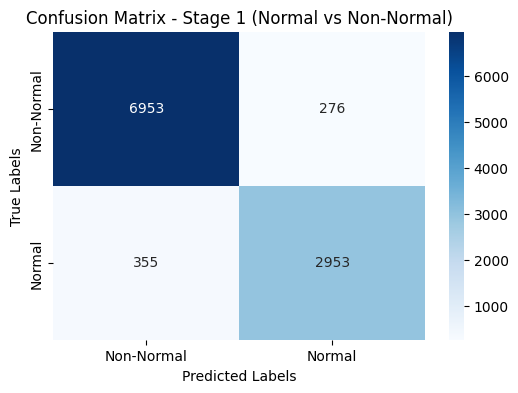

In [ ]:
# Calculate confusion matrix for Stage 1
conf_matrix_stage1 = confusion_matrix(y_test_binary, y_pred_stage1)

# Plot heatmap for Stage 1
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_stage1, annot=True, fmt="d", cmap="Blues", xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
plt.title("Confusion Matrix - Stage 1 (Normal vs Non-Normal)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 1.2  Stage 1:  Neural Network

### Neural Network Layers

In [ ]:
# Define the layers in an array
layers = [
    Dense(units=256, activation='relu', input_shape=(X_train_tfidf_stage1.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dense(units=2, activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Model Training

In [ ]:

# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage1.toarray(),
                    y_train_tfidf_stage1,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3
                    )


Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8831 - loss: 2.2164 - val_accuracy: 0.8464 - val_loss: 0.5045
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9238 - loss: 0.3385 - val_accuracy: 0.9242 - val_loss: 0.2951
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9291 - loss: 0.2835 - val_accuracy: 0.9274 - val_loss: 0.2728
Epoch 4/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9324 - loss: 0.2679 - val_accuracy: 0.9276 - val_loss: 0.2689
Epoch 5/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9326 - loss: 0.2597 - val_accuracy: 0.9295 - val_loss: 0.2609
Epoch 6/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9377 - loss: 0.2432 - val_accuracy: 0.9297 - val_loss: 0.2512
Epoch 7/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9373 - loss: 0.2348 - val_accuracy: 0.9318 - val_loss: 0.2477
Epoch 8/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9376 - loss: 0.2299 - val_

### Classification report on train

In [ ]:
# Evaluate binary classifier
y_pred_stage1 = model.predict(X_train_tfidf_stage1)
y_pred_stage1 = y_pred_stage1.argmax(axis=1)  # Convert probabilities to class predictions

print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage1, y_pred_stage1))
print(classification_report(y_train_tfidf_stage1, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage1, y_pred_stage1))


1317/1317 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.9479166666666666
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     29109
           1       0.90      0.93      0.92     13035

    accuracy                           0.95     42144
   macro avg       0.94      0.94      0.94     42144
weighted avg       0.95      0.95      0.95     42144

Confusion Matrix:
 [[27813  1296]
 [  899 12136]]


### Confusion Matrix

In [ ]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage1.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test_binary,y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix

conf_matrix_nn = confusion_matrix(y_test_binary,y_pred)

# Print classification report
print("Confusion Matrix:\n",)
print( conf_matrix_nn)


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy: 0.931099933567429
Confusion Matrix:

[[6814  415]
 [ 311 2997]]


In [ ]:
print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7229
           1       0.88      0.91      0.89      3308

    accuracy                           0.93     10537
   macro avg       0.92      0.92      0.92     10537
weighted avg       0.93      0.93      0.93     10537



### Heat Map

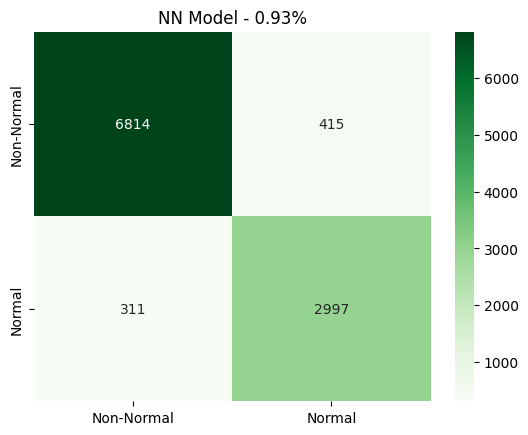

In [ ]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

### Model Loss and Accuracy

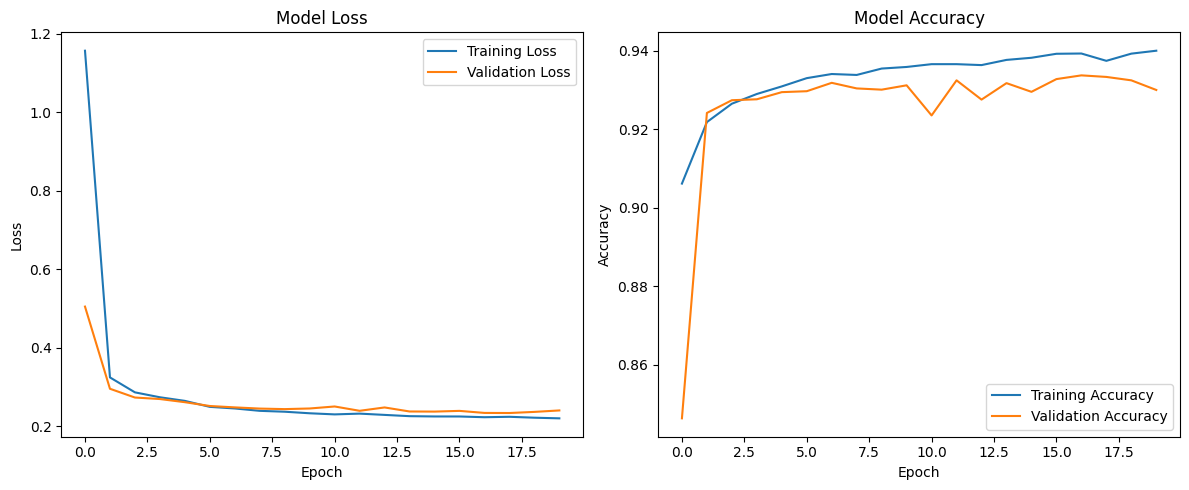

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 1.3 Best Classifier for  Stage 1

we chose the best classfier for this stage

In [ ]:
binary_classifier = logistic1_classifier

# ***🖇 Non Normal Statement Classification***

## 2.1 SVM Stage 2

### Grid Search Params

In [ ]:
# Define the binary classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [ 0.03,0.01, 0.02],  # Regularization strength
    'solver': ['lbfgs'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)



### Train the Model

In [ ]:
# Fit the grid search on the training data
grid_search.fit(X_train_tfidf_stage2, y_train_tfidf_stage2)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.03, 0.01, 0.02], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

### Best Classifier

In [ ]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Train multi-class classifier for Stage 2
logistic_classifier =best_clf
logistic_classifier = SVC(random_state=42,kernel='linear',C=0.3)

logistic_classifier.fit(X_train_tfidf_stage2, y_train_tfidf_stage2)


SVC(C=0.3, kernel='linear', random_state=42)

### Classification report on training

In [ ]:
# Evaluate binary classifier
y_pred_stage2 = logistic_classifier.predict(X_train_tfidf_stage2)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage2, y_pred_stage2))
print(classification_report(y_train_tfidf_stage2, y_pred_stage2))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage2, y_pred_stage2))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.748565735683122
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3086
           1       0.91      0.70      0.79      2250
           2       0.71      0.82      0.76     12388
           3       0.97      0.42      0.58       840
           4       0.81      0.52      0.63      2051
           5       0.73      0.72      0.72      8494

    accuracy                           0.75     29109
   macro avg       0.83      0.67      0.72     29109
weighted avg       0.76      0.75      0.75     29109

Confusion Matrix:
 [[ 2599    18   349     1    64    55]
 [   73  1567   481     2    29    98]
 [  182    89 10130     3    81  1903]
 [   17     3   393   351    16    60]
 [  204    16   617     1  1057   156]
 [   39    26  2288     2    53  6086]]


### Classification Report

In [ ]:

# Evaluate multi-class classifier
y_pred_stage2 = logistic_classifier.predict(X_test_tfidf_stage2)
print("Stage 2 (Multi-Class Classification) - Specific Conditions")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_stage2))
print(classification_report(y_test_multi, y_pred_stage2))
conf_matrix_stage2= confusion_matrix(y_test_multi, y_pred_stage2)
print("Confusion Matrix:\n",conf_matrix_stage2)


Stage 2 (Multi-Class Classification) - Specific Conditions
Accuracy: 0.7018951445566468
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       755
           1       0.87      0.66      0.75       527
           2       0.66      0.78      0.72      3016
           3       0.97      0.31      0.47       237
           4       0.77      0.46      0.58       536
           5       0.68      0.67      0.68      2158

    accuracy                           0.70      7229
   macro avg       0.79      0.62      0.67      7229
weighted avg       0.72      0.70      0.70      7229

Confusion Matrix:
 [[ 607    8  102    0   19   19]
 [  14  348  125    0    8   32]
 [  58   28 2352    0   21  557]
 [   6    4  121   74   11   21]
 [  53    4  185    1  249   44]
 [  10   10  676    1   17 1444]]


### Heat Map

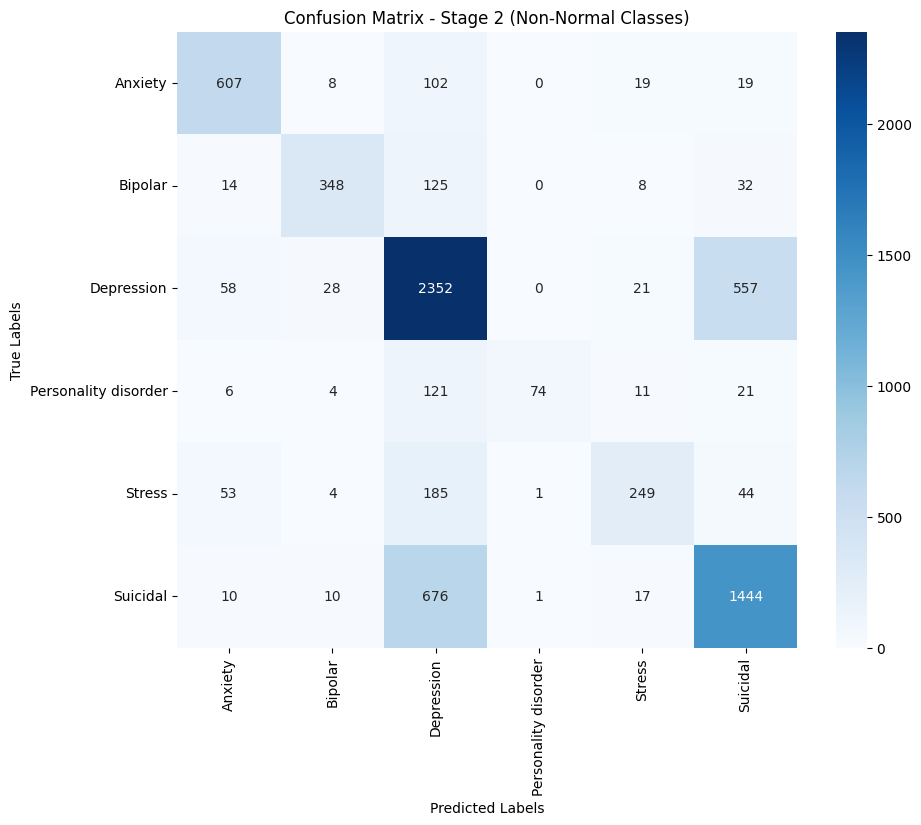

In [ ]:
# Plot heatmap for Stage 2
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_stage2, annot=True, fmt="d", cmap="Blues", xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
plt.title("Confusion Matrix - Stage 2 (Non-Normal Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 2.2 Neural Network  Stage 2

### Network Layers

In [ ]:
from tensorflow.keras.layers import Conv1D,LSTM, MaxPooling1D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [ ]:
# Define the layers in an array
layers = [

    Dense(units=64, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.3),  # Dropout Layer 1
    # Dense(units=30, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    # BatchNormalization(),
    Dense(units=15, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.2),  # Dropout Layer 1
    # Dense(units=10, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dense(units=6, activation='softmax')  # Output Layer
]


# Define the updated layers
# layers = [
#     # Convolutional Layer
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1], 1)),
#     MaxPooling1D(pool_size=2),  # Pooling Layer to reduce dimensionality
#     BatchNormalization(),
#     Conv1D(filters=8, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),  # Pooling Layer to reduce dimensionality
#     BatchNormalization(),
#     Flatten(),  # Flatten the Conv1D output for the Dense layers

#     # Dense Layers
#     Dense(units=120, activation='relu', kernel_regularizer=l2(0.01)),
# #    BatchNormalization(),
#     Dropout(rate=0.3),  # Dropout Layer 1
#     Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(rate=0.2),  # Dropout Layer 2
#     Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)),
#     Dense(units=6, activation='softmax')  # Output Layer
# ]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Model Train

In [ ]:

# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage2.toarray(),
                    y_train_tfidf_stage2,
                    epochs=27,
                    batch_size=256,
                    validation_split=0.3
                    )


Epoch 1/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3612 - loss: 2.7485 - val_accuracy: 0.4631 - val_loss: 2.1544
Epoch 2/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6506 - loss: 1.5311 - val_accuracy: 0.4817 - val_loss: 1.7221
Epoch 3/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6989 - loss: 1.1762 - val_accuracy: 0.5195 - val_loss: 1.5127
Epoch 4/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7171 - loss: 1.0354 - val_accuracy: 0.5708 - val_loss: 1.3677
Epoch 5/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7303 - loss: 0.9636 - val_accuracy: 0.6141 - val_loss: 1.2417
Epoch 6/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7330 - loss: 0.9181 - val_accuracy: 0.6570 - val_loss: 1.1309
Epoch 7/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7377 - loss: 0.8936 - val_accuracy: 0.6766 - val_loss: 1.0478
Epoch 8/27
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7434 - loss: 0.8775 - val_accuracy: 0.6861 - v

In [ ]:
nn_classifier = model

### Classification Report

In [ ]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage2.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_score_final = accuracy_score(y_test_multi,y_pred)
print("\n")
print("Accuracy:", accuracy_score_final)

# Compute the confusion matrix
classification_report_final =classification_report(y_test_multi, y_pred)
print(f"Overall Accuracy: {accuracy_score_final:.2f}")

print(classification_report_final)
conf_matrix_nn = confusion_matrix(y_test_multi,y_pred)

# Print classification report
print("Confusion Matrix:\n",conf_matrix_nn)


226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy: 0.6875086457324665
Overall Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       755
           1       0.80      0.70      0.75       527
           2       0.66      0.76      0.71      3016
           3       0.73      0.45      0.55       237
           4       0.67      0.50      0.58       536
           5       0.67      0.62      0.64      2158

    accuracy                           0.69      7229
   macro avg       0.72      0.63      0.67      7229
weighted avg       0.69      0.69      0.69      7229

Confusion Matrix:
 [[ 582   13   90    8   40   22]
 [  15  367  111    1    7   26]
 [  57   38 2297   21   40  563]
 [   7    5   79  106   14   26]
 [  49   14  157    4  270   42]
 [  18   21  734    6   31 1348]]


### Heat Map

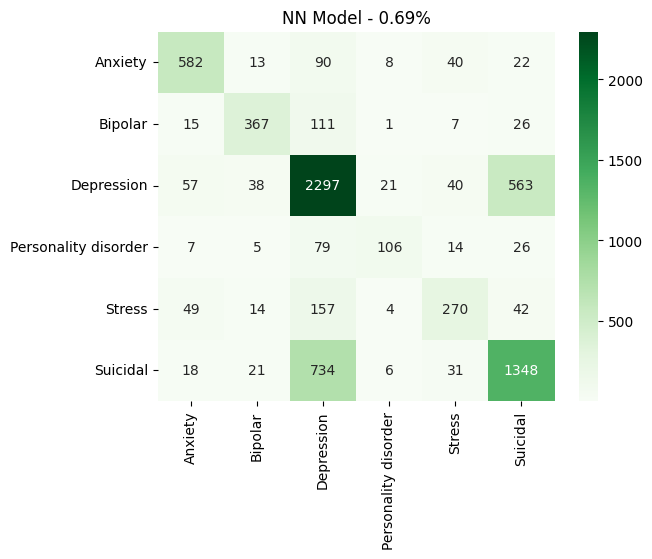

In [ ]:
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_score_final:.2}%')
plt.show()

### Model Loss and Accuracy

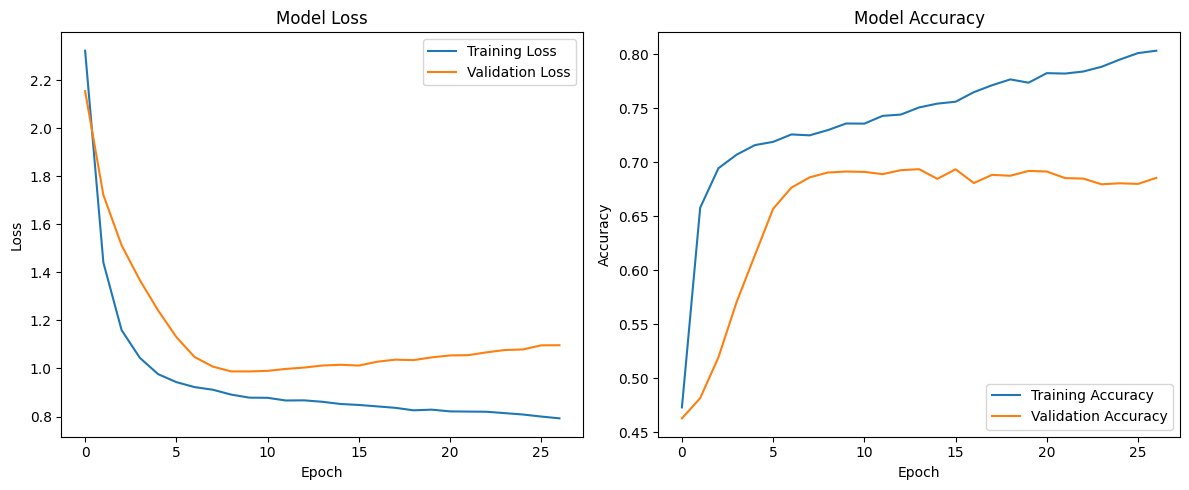

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 2.3 Best Model

choosing the best classfier for this stage

In [ ]:
multi_classifier = logistic_classifier

# ***🖇 combined Two Classifiers***

## ***3.1 Predict the test set***

### Initialize list for final predictions and true labels


In [ ]:
# Initialize list for final predictions and true labels
final_predictions = []
ground_truth = y_test.tolist()  # Convert y_test to list for easy comparison


### Iterate Over the Test Samples

In [ ]:

# Iterate through each sample in X_test
for i, test in enumerate(X_test):
    # Vectorize the text for Stage 1
    # vectorized_text_stage1 = vectorizer_stage1.transform([text])

    # Stage 1 Prediction (Binary Classification)
    stage1_prediction = binary_classifier.predict(test)[0]

    if stage1_prediction == binary_encoder.transform(['Normal'])[0]:  # If predicted as "Normal"
        final_predictions.append('Normal')
    else:
        # If predicted as "Non-Normal," vectorize for Stage 2 and predict specific condition
        # vectorized_text_stage2 = vectorizer_stage2.transform([text])
        stage2_prediction = multi_classifier.predict(test)[0]
        #stage2_prediction = model.predict(test).argmax(axis=1)

        final_predictions.append(multi_encoder.inverse_transform([stage2_prediction])[0])


## ***3.2 Classification Report***

In [ ]:
accuracy_score_final=accuracy_score(ground_truth, final_predictions)
classification_report_final =classification_report(ground_truth, final_predictions)
# Final Combined Evaluation
print("\nCombined Two-Level Classification Results")
print(f"Overall Accuracy: {accuracy_score_final:.2f}")
print(classification_report_final)



Combined Two-Level Classification Results
Overall Accuracy: 0.75
                      precision    recall  f1-score   support

             Anxiety       0.78      0.79      0.79       755
             Bipolar       0.86      0.65      0.74       527
          Depression       0.64      0.76      0.69      3016
              Normal       0.91      0.89      0.90      3308
Personality disorder       0.95      0.30      0.46       237
              Stress       0.66      0.43      0.52       536
            Suicidal       0.66      0.65      0.65      2158

            accuracy                           0.75     10537
           macro avg       0.78      0.64      0.68     10537
        weighted avg       0.76      0.75      0.74     10537



## ***3.3 Overall Heat Map***

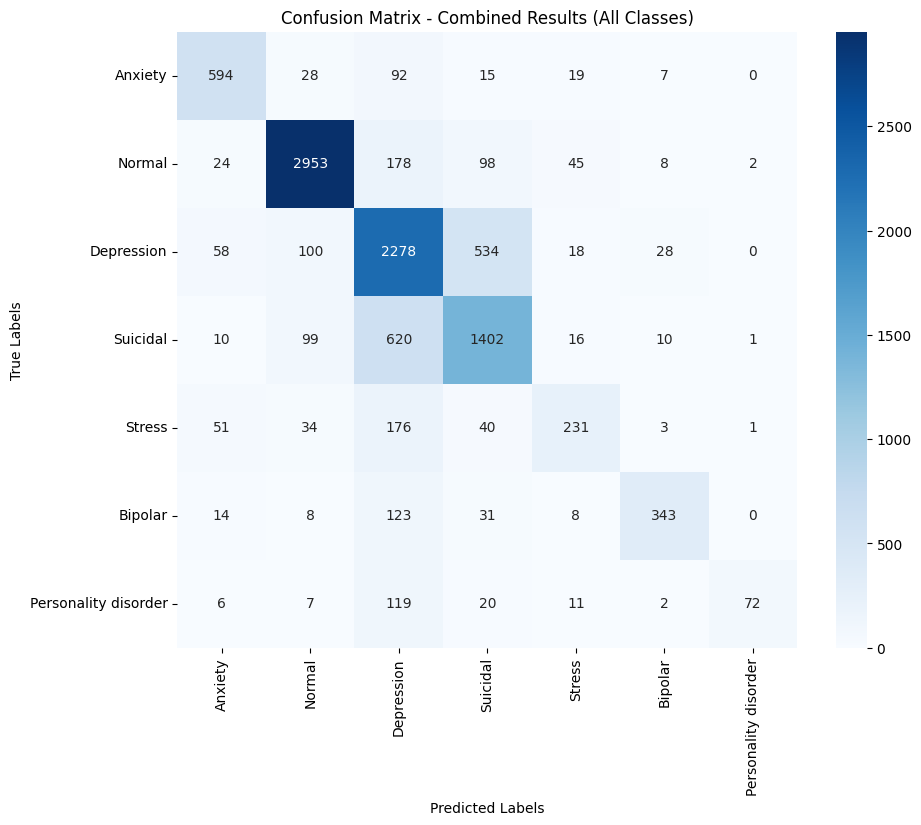

In [ ]:
# Confusion Matrix and Heatmap for Combined Results
conf_matrix_combined = confusion_matrix(ground_truth, final_predictions, labels=df['status'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt="d", cmap="Blues", xticklabels=df['status'].unique(), yticklabels=df['status'].unique())
plt.title("Confusion Matrix - Combined Results (All Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## ***3.4 Conclusion***